# Exploring the claimant reliability dataset

In [1]:
# import requirements
import os
import pandas as pd
import matplotlib.pyplot as plt
from typing import Callable

In [2]:
# code for loading the dataset

from util import gather_dataset

# load the dataset using custom function
df = gather_dataset('./data/claimant_data_processed/')
# remove answers with zero-score
df_no_zero = df[df['score'] != 0]

df.head()

,worker_id,task_id,task_response_id,file_id,sentence,tokens_id,publisher,source,reliability,Optional Comments:,batch_no,score
0,23QWQCPZ7PNP,f79dff90-7723-4c33-9582-33e46ab6176c,15d3b8d0-d17f-49b2-bb2f-c113957cddf7,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",5 - The source is fully reliable,NaN,1,5
1,9R3XRNAAW7RR,f79dff90-7723-4c33-9582-33e46ab6176c,1bb0a245-1455-4ce7-8704-7e00c2b00d29,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",3 - The source is potentially reliable,NaN,1,3
2,9R3XRNAAW7RR,f040bde3-4c11-482c-b7e3-4bd080b1a7f7,2c7856c7-0bc6-4f40-9781-37b6942a2e36,PublicHealth-org_20170623T200727.conll.annot,14,1 2,PublicHealth.org,The article,5 - The source is fully reliable,NaN,1,5
3,MWHG9Y6DNGR9,f79dff90-7723-4c33-9582-33e46ab6176c,e2b709b8-16f3-4bc4-b513-8c2f28f0f1e1,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",5 - The source is fully reliable,NaN,1,5
4,D7HVJTEKMYNW,e3f62e34-fb40-4bda-a5b4-acd3d72c1160,f16d6d05-ab57-4117-85b5-8c87fcd5a689,National-Vaccine-Information-Center-(NVIC)_201...,26,5 6,National Vaccine Information Center (NVIC),Dr. Cherry,5 - The source is fully reliable,NaN,1,5


In [3]:
# wrapper for printing results of functions

def print_formatting(func: Callable) -> Callable:
    """Decorator for printing formatting around the function prints"""

    def wrapper(*args, **kwargs):
        padd = '-'
        print(f'{" "+func.__name__+"() ":{padd}^80}')
        docstring = f'"""{func.__doc__}"""'
        print(f'{docstring:^80}\n')
        func(*args, **kwargs)
        print('-' * 80 + '\n')

    return wrapper


In [5]:
@print_formatting
def find_pilot_duplicates(pilot_path: str) -> None:
    """Test if there are duplicates of the text in the pilot in the other batches"""

    pilot_df = pd.read_csv(pilot_path)

    main_df = pd.DataFrame()
    data_path = '/'.join(pilot_path.split('/')[:-1]) + '/'
    for file in os.listdir(data_path):
        if file.endswith('.csv') and not file.endswith('b1.csv'):
            main_df = pd.concat([main_df, pd.read_csv(os.path.join(data_path, file))])


    overlap = pd.merge(pilot_df, main_df, how='inner', on=['publisher','sentence', 'tokens_id'])

    if overlap.empty:
        print('No duplicates found')
    else:
        print('Duplicates found:')
        print(overlap.to_string())
    
find_pilot_duplicates('./data/claimant_data/aggregated/Rating the Reliability of Sources and Publishers - b1.csv')

--------------------------- find_pilot_duplicates() ----------------------------
"""Test if there are duplicates of the text in the pilot in the other batches"""

No duplicates found
--------------------------------------------------------------------------------



## Basic Overview

In [6]:
@print_formatting
def unique_tasks(df: pd.DataFrame) -> None:
    """Counts the amount of unique tasks in the dataset"""

    unique_ids = df['task_id'].unique()

    print(f'There are {len(unique_ids)} tasks in this dataset')

unique_tasks(df_no_zero)

-------------------------------- unique_tasks() --------------------------------
             """Counts the amount of unique tasks in the dataset"""             

There are 2444 tasks in this dataset
--------------------------------------------------------------------------------



In [7]:
@print_formatting
def answers_provided(df: pd.DataFrame) -> None:
    """Counts the amount of total answers provided"""

    print(f'{len(df)} answers were provided in this dataset')

answers_provided(df_no_zero)

------------------------------ answers_provided() ------------------------------
               """Counts the amount of total answers provided"""                

16899 answers were provided in this dataset
--------------------------------------------------------------------------------



---------------------- reliability_scores_distribution() -----------------------
     """Prints the distribution of the (reliability) scores in a column"""      

score
0     359
1    2483
2    3304
3    5299
4    3253
5    2560
Name: count, dtype: int64
--------------------------------------------------------------------------------



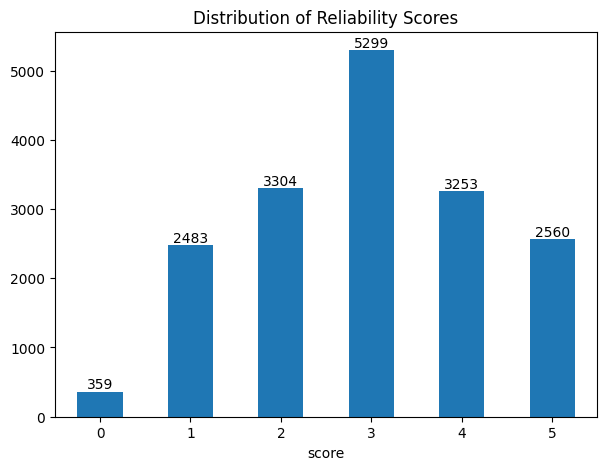

In [6]:
@print_formatting
def reliability_scores_distribution(column: pd.Series, annot: bool=False, rot: bool|int=False, figsize: tuple[float,float]=(7,5)) -> None:
    """Prints the distribution of the (reliability) scores in a column"""

    print(column.value_counts().sort_index())

    # df.hist(column='z_score', bins=10, grid=False)
    ax = column.value_counts().sort_index().plot(kind='bar', title='Distribution of Reliability Scores', rot=rot, figsize=figsize)

    if annot: 
        for container in ax.containers:
            ax.bar_label(container)

reliability_scores_distribution(df['score'], annot=True, rot=True)

### Worker statistics

In [8]:
# count how many workers participated in the task

@print_formatting
def count_unique(df: pd.DataFrame, colname: str) -> None:
    """Prints the number of unique values in a column"""

    print(f'{len(df[colname].unique())} different {colname.split("_")[0]}s occur in the task.')

count_unique(df, 'worker_id')

-------------------------------- count_unique() --------------------------------
              """Prints the number of unique values in a column"""              

107 different workers occur in the task.
--------------------------------------------------------------------------------



------------------------ count_judgements_per_worker() -------------------------
                """Prints the number of judgements per worker"""                

count    107.000000
mean     161.289720
std      205.521794
min        1.000000
25%       15.000000
50%       35.000000
75%      282.000000
max      748.000000
Name: count, dtype: float64


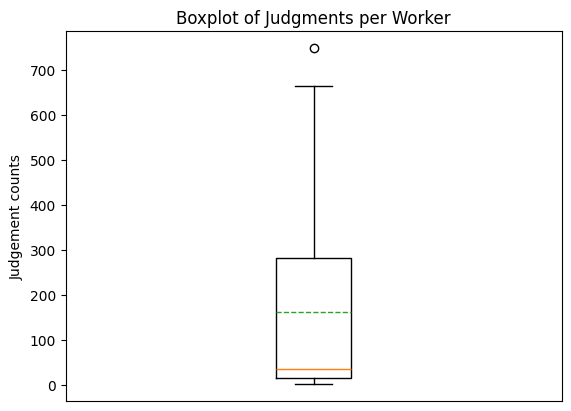

--------------------------------------------------------------------------------



In [9]:
@print_formatting
def count_judgements_per_worker(df: pd.DataFrame) -> None:
    """Prints the number of judgements per worker"""

    # average number of judgements per user
    judgements_per_worker = df['worker_id'].value_counts()
    print(judgements_per_worker.describe())

    # boxplot of judgements per user
    plt.boxplot(judgements_per_worker, showmeans=True, meanline=True)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.title('Boxplot of Judgments per Worker')
    plt.ylabel('Judgement counts')
    plt.show()

count_judgements_per_worker(df)

------------------------------ score_per_worker() ------------------------------
              """Prints the mean scores in `colname` per worker"""              

Average reliability score: 3.006095035209184
Scores grouped by worker statistics
count    107.000000
mean       3.190215
std        0.525990
min        2.092920
25%        2.900000
50%        3.133333
75%        3.429167
max        5.000000
Name: mean, dtype: float64
There are 3 workers with an average of 5. This average is taken over [1] judgment(s).
The lowest average judgment score is 2.093. This average is taken over [226] judgment(s).


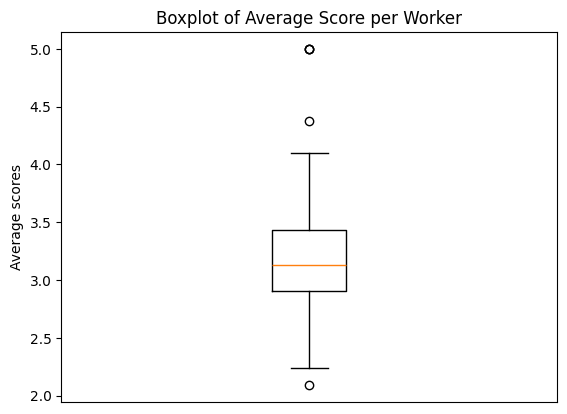

--------------------------------------------------------------------------------



In [68]:
@print_formatting
def score_per_worker(df: pd.DataFrame, colname: str) -> None:
    """Prints the mean scores in `colname` per worker"""
    
    # compute overall average
    print(f'Average reliability score: {df[colname].mean()}')

    # compute average per worker
    scores = pd.merge(df.groupby('worker_id')[colname].mean(), df.groupby('worker_id')[colname].count(), how='inner', on='worker_id')
    scores.rename(columns={'score_x': 'mean', 'score_y': 'support', 'z_score_task_x': 'mean', 'z_score_task_y': 'support', 'z_score_worker_x': 'mean', 'z_score_worker_y': 'support'}, inplace=True)
    print('Scores grouped by worker statistics')
    print(scores['mean'].describe())
    # print(f'Average {colname} per worker:\n{scores.to_string()}')
    
    if colname == 'score':
        print(f'There are {len(scores[scores["mean"] == 5])} workers with an average of 5. This average is taken over {scores[scores["mean"] == 5]["support"].unique()} judgment(s).')
        print(f'The lowest average judgment score is {scores.min()["mean"]:.3f}. This average is taken over {scores[scores["mean"] == scores.min()["mean"]]["support"].unique()} judgment(s).')

    # boxplot of averages per worker
    plt.boxplot(df.groupby('worker_id')[colname].mean())
    plt.title(f'Boxplot of Average {colname.capitalize()} per Worker')
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.ylabel(f'Average {colname}s')
    plt.show()

score_per_worker(df_no_zero, 'score')

------------------------------ stdev_per_worker() ------------------------------
"""Prints the mean scores in `colname` per worker after taking the standard deviation"""

Overall standard deviation for all scores: 1.2576755046330692
Scores grouped by worker after taking the standard deviation
count    102.000000
mean       1.170269
std        0.278651
min        0.000000
25%        1.047104
50%        1.195955
75%        1.317713
max        1.916252
Name: stdev, dtype: float64


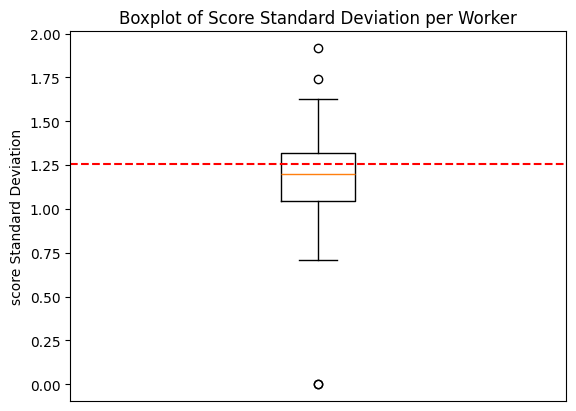

--------------------------------------------------------------------------------



In [11]:

@print_formatting
def stdev_per_worker(df: pd.DataFrame, colname: str) -> None:
    """Prints the mean scores in `colname` per worker after taking the standard deviation"""
    
    # compute overall average
    print(f'Overall standard deviation for all {colname}s: {df[colname].std()}')

    # compute stdev per worker
    scores = pd.merge(df.groupby('worker_id')[colname].std(), df.groupby('worker_id')[colname].count(), how='inner', on='worker_id')
    scores.rename(columns={'score_x': 'stdev', 'score_y': 'support', 'z_score_task_x': 'stdev', 'z_score_task_y': 'support', 'z_score_worker_x': 'stdev', 'z_score_worker_y': 'support'}, inplace=True)
    print('Scores grouped by worker after taking the standard deviation')
    print(scores['stdev'].describe())
    # print(f'Average {colname} per worker:\n{scores.to_string()}')

    # boxplot of averages per worker
    # print(df.groupby('worker_id')[colname].std().fillna(0))
    plt.boxplot(df.groupby('worker_id')[colname].std().dropna())
    plt.title(f'Boxplot of {colname.capitalize()} Standard Deviation per Worker')
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.ylabel(f'{colname} Standard Deviation')
    plt.axhline(df[colname].std(), color='r', linestyle='--', label='Overall Stdev')
    plt.show()

stdev_per_worker(df_no_zero, 'score')

### Publisher statistics

In [12]:
# count how many unique publishers there are in the dataset
count_unique(df, 'publisher')

-------------------------------- count_unique() --------------------------------
              """Prints the number of unique values in a column"""              

146 different publishers occur in the task.
--------------------------------------------------------------------------------



------------------------- count_tasks_per_publisher() --------------------------
                 """Prints the number of tasks per publisher"""                 

count    146.000000
mean      16.739726
std       21.163096
min        1.000000
25%        3.000000
50%        8.500000
75%       22.750000
max      165.000000
Name: count, dtype: float64
Median: 8.5


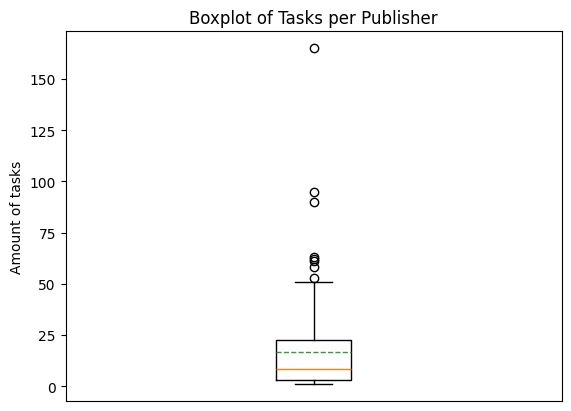

Outliers with > 50 tasks:
publisher
Stop Mandatory Vaccination                              165
www.thinktwice.com                                       95
NaturalNews                                              90
www.greenmedinfo.com                                     63
en.wikipedia.org                                         62
International Medical Council on Vaccination             61
www.cdc.gov                                              58
cid.oxfordjournals.org                                   53
vaccine-injury.info                                      51
________________Child Health Safety_________________     51
Name: count, dtype: int64
--------------------------------------------------------------------------------



In [84]:
@print_formatting
def count_tasks_per_publisher(df: pd.DataFrame) -> None:
    """Prints the number of tasks per publisher"""

    # average number of judgements per user
    task_publisher_df = df.groupby(['task_id', 'publisher']).size().reset_index()
    tasks_per_publisher = task_publisher_df['publisher'].value_counts()

    print(tasks_per_publisher.describe())
    print(f'Median: {tasks_per_publisher.median()}')

    # boxplot of tasks per publisher
    plt.boxplot(tasks_per_publisher, showmeans=True, meanline=True)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.title('Boxplot of Tasks per Publisher')
    plt.ylabel('Amount of tasks')
    plt.show()

    outlier_limit = 50
    print(f'Outliers with > {outlier_limit} tasks:')
    print(tasks_per_publisher[tasks_per_publisher > outlier_limit])

count_tasks_per_publisher(df)

---------------------------- score_per_publisher() -----------------------------
               """Prints the scores in `colname` per publisher"""               

The mean reliability score per publisher is:

NewsComAu                                                  1.438943
mom.me                                                     1.533631
mirror                                                     1.547623
www.tripadvisor.com                                        1.555006
Heavy.com                                                  1.588885
LDI                                                        1.646776
Infowars                                                   1.725397
PolitiFact                                                 1.813793
Skeptical Raptor                                           1.864957
www.pregnancyforum.co.uk                                   1.883652
blogs.cdc.gov                                              1.986302
AGE OF AUTISM                              

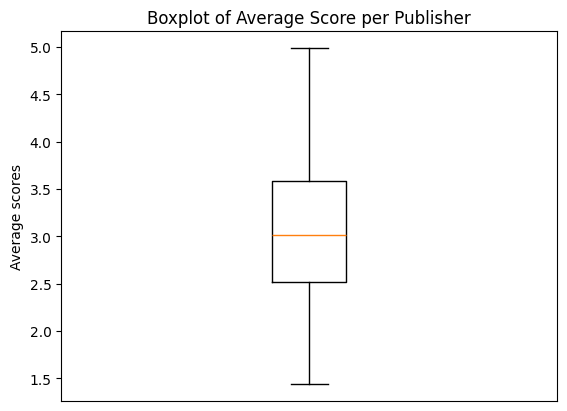

--------------------------------------------------------------------------------



In [85]:
@print_formatting
def score_per_publisher(df: pd.DataFrame, colname: str) -> None:
    """Prints the scores in `colname` per publisher"""

    unique_publishers = df['publisher'].unique()    

    print('The mean reliability score per publisher is:')
    print(df.groupby('publisher')[colname].mean().sort_values().to_string().lstrip('publisher'))
    print()

    print('The distribution statistics:')
    print(df.groupby('publisher')[colname].mean().describe())

    # create boxplot of average scores per publisher
    plt.boxplot(df.groupby('publisher')[colname].mean())
    plt.title(f'Boxplot of Average {colname.capitalize()} per Publisher')
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.ylabel(f'Average {colname}s')
    plt.show()


score_per_publisher(df_no_zero, 'score')

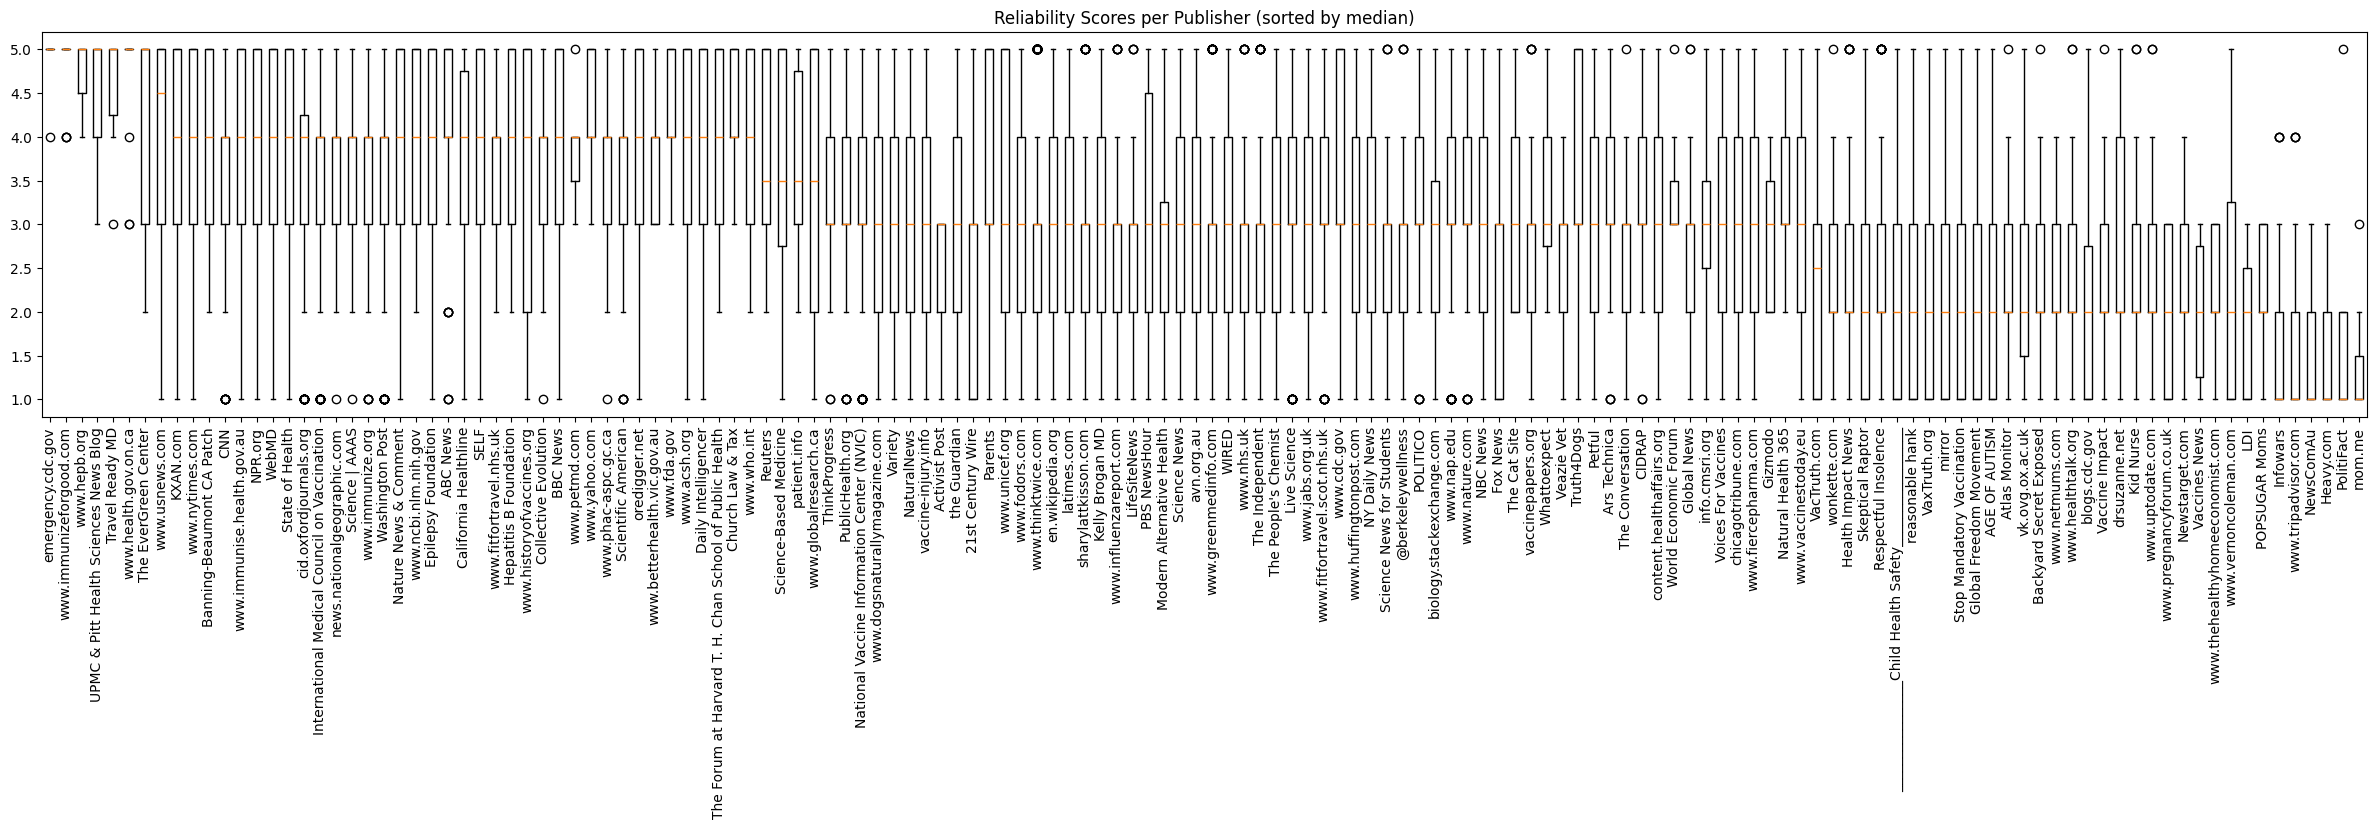

In [7]:
# boxplot per publisher
def boxplot_per_publisher(df: pd.DataFrame, colname: str, subset: list[str]|None = None, figsize:tuple[float,float] = (30,5), sortbymedian: bool = True, sortbydistribution: bool = False) -> None:
    """Prints the boxplot of scores in `colname` per publisher"""

    # initialize plot
    plt.figure(figsize=figsize)

    unique_publishers = df['publisher'].unique()    

    if sortbydistribution:
        # sort by how wide the IQR is
        sorted_publishers = sorted({publisher: df[df['publisher']==publisher][colname].quantile(0.75) - df[df['publisher']==publisher][colname].quantile(0.25) for publisher in unique_publishers}.items(), key=lambda x: x[1], reverse=True)
        # convert list with publisher + score to publisher only
        sorted_publishers = [publisher_name for publisher_name, score in sorted_publishers]
        plt.title(f'Reliability {colname.capitalize()}s per Publisher (sorted by IQR)')

    elif sortbymedian:
        # sort publishers by median score
        sorted_publishers = sorted({publisher: df[df['publisher']==publisher][colname].median() for publisher in unique_publishers}.items(), key=lambda x: x[1], reverse=True)
        # convert list with publisher + score to publisher only
        sorted_publishers = [publisher_name for publisher_name, score in sorted_publishers]
        plt.title(f'Reliability {colname.capitalize()}s per Publisher (sorted by median)')
    else:
        sorted_publishers = unique_publishers
        plt.title(f'Reliability {colname.capitalize()}s per Publisher')


    # filter only on subset items if a subset was specified
    if subset:
        # first see if all subset items appear in the publishers
        for publisher in subset:
            if publisher not in unique_publishers:
                raise ValueError(f'publisher {publisher} does not occur in the dataset')
        
        # then filter the values
        sorted_publishers = [publisher for publisher in sorted_publishers if publisher in subset]

    # collect scores for sorted and filtered publishers
    scores = [df[df['publisher']==publisher][colname] for publisher in sorted_publishers]

    # finish the plot
    plt.boxplot(scores, labels=sorted_publishers)
    plt.xticks(rotation=90)
    plt.show()
    
boxplot_per_publisher(df_no_zero, 'score')

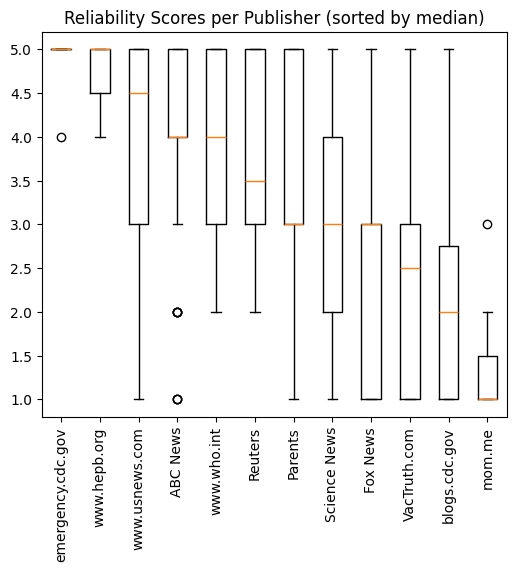

In [101]:
# create a subset of the graph above for the paper
boxplot_per_publisher(
    df_no_zero, 
    'score', 
    ['emergency.cdc.gov', 'www.hepb.org', 'www.usnews.com', 'ABC News', 'www.who.int', 'Reuters', 'Parents', 'Science News', 'Fox News', 'VacTruth.com', 'blogs.cdc.gov', 'mom.me'], 
    figsize=(6,5)
)


## Z-score data per task and run some visualizations/statistics again

#### Z-score per task

In [4]:
from util import z_score_per_task

# df = z_score_per_task(df)
df_no_zero = z_score_per_task(df_no_zero)
df_no_zero.head()

/home/bbjoverbeek/master_thesis/util.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  z_scores_df = pd.concat(


,worker_id,task_id,task_response_id,file_id,sentence,tokens_id,publisher,source,reliability,Optional Comments:,batch_no,score,z_score_task
0,23QWQCPZ7PNP,f79dff90-7723-4c33-9582-33e46ab6176c,15d3b8d0-d17f-49b2-bb2f-c113957cddf7,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",5 - The source is fully reliable,NaN,1,5,0.777778
1,9R3XRNAAW7RR,f79dff90-7723-4c33-9582-33e46ab6176c,1bb0a245-1455-4ce7-8704-7e00c2b00d29,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",3 - The source is potentially reliable,NaN,1,3,-1.444444
2,9R3XRNAAW7RR,f040bde3-4c11-482c-b7e3-4bd080b1a7f7,2c7856c7-0bc6-4f40-9781-37b6942a2e36,PublicHealth-org_20170623T200727.conll.annot,14,1 2,PublicHealth.org,The article,5 - The source is fully reliable,NaN,1,5,1.257237
3,MWHG9Y6DNGR9,f79dff90-7723-4c33-9582-33e46ab6176c,e2b709b8-16f3-4bc4-b513-8c2f28f0f1e1,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",5 - The source is fully reliable,NaN,1,5,0.777778
4,D7HVJTEKMYNW,e3f62e34-fb40-4bda-a5b4-acd3d72c1160,f16d6d05-ab57-4117-85b5-8c87fcd5a689,National-Vaccine-Information-Center-(NVIC)_201...,26,5 6,National Vaccine Information Center (NVIC),Dr. Cherry,5 - The source is fully reliable,NaN,1,5,0.816497


---------------------- reliability_scores_distribution() -----------------------
     """Prints the distribution of the (reliability) scores in a column"""      

z_score_task
-3.0       2
-2.9       1
-2.7       1
-2.4      66
-2.3      14
-2.2      97
-2.1      21
-2.0     103
-1.9     147
-1.8     181
-1.7     173
-1.6     212
-1.5     238
-1.4     273
-1.3     486
-1.2     463
-1.1     216
-1.0     560
-0.9     541
-0.8     659
-0.7     244
-0.6     774
-0.5     339
-0.4     731
-0.3     282
-0.2     637
-0.1     279
 0.0    1127
 0.1     257
 0.2     673
 0.3     291
 0.4     875
 0.5     408
 0.6     905
 0.7     231
 0.8     659
 0.9     578
 1.0     653
 1.1     229
 1.2     453
 1.3     431
 1.4     204
 1.5     214
 1.6     188
 1.7     188
 1.8     196
 1.9     143
 2.0      86
 2.1      20
 2.2      87
 2.3      15
 2.4      44
 2.5       1
 2.6       3
Name: count, dtype: int64
--------------------------------------------------------------------------------



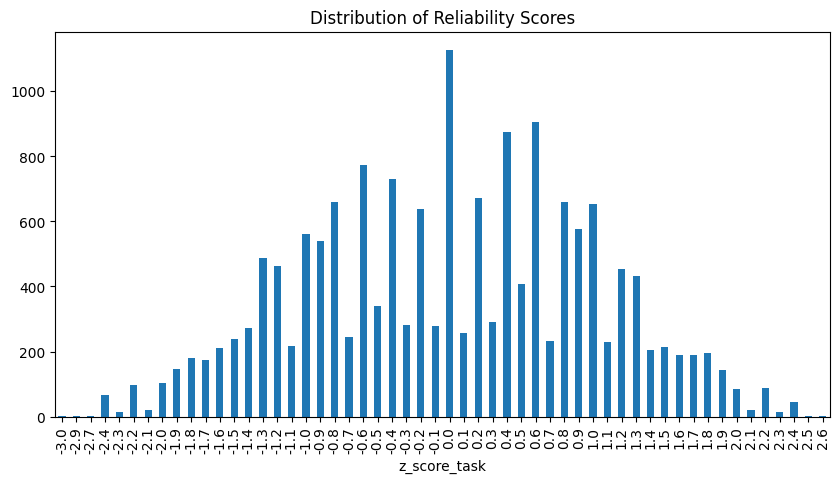

In [8]:
reliability_scores_distribution(df_no_zero['z_score_task'].round(1), rot=90, figsize=(10,5))

### Worker statistics

------------------------------ score_per_worker() ------------------------------
              """Prints the mean scores in `colname` per worker"""              

Average reliability score: -1.2613931044915678e-18
Scores grouped by worker statistics
count    107.000000
mean       0.090003
std        0.459894
min       -0.838409
25%       -0.208859
50%        0.047900
75%        0.389841
max        1.946657
Name: mean, dtype: float64


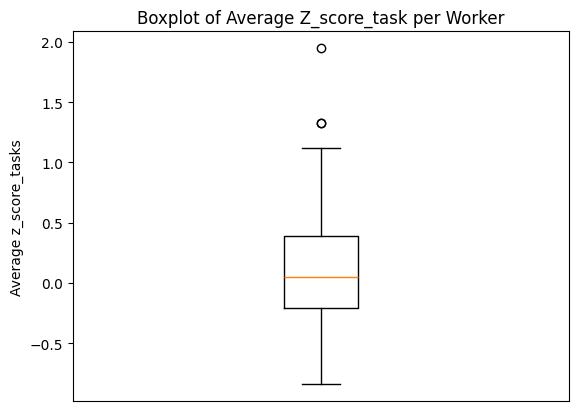

--------------------------------------------------------------------------------



In [17]:
score_per_worker(df_no_zero, 'z_score_task')

------------------------------ stdev_per_worker() ------------------------------
"""Prints the mean scores in `colname` per worker after taking the standard deviation"""

Overall standard deviation for all z_score_tasks: 0.9943918967930211
Scores grouped by worker after taking the standard deviation
count    102.000000
mean       0.923783
std        0.229212
min        0.309901
25%        0.798379
50%        0.888755
75%        1.011675
max        1.931627
Name: stdev, dtype: float64


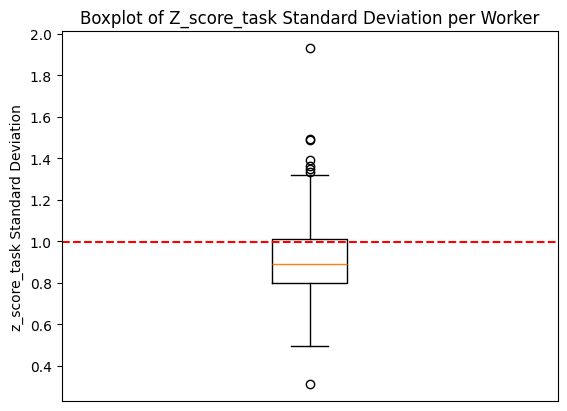

--------------------------------------------------------------------------------



In [18]:
# standard deviation of the workers individually vs the standard deviation of all workers
stdev_per_worker(df_no_zero, 'z_score_task')

#### Publisher statistics

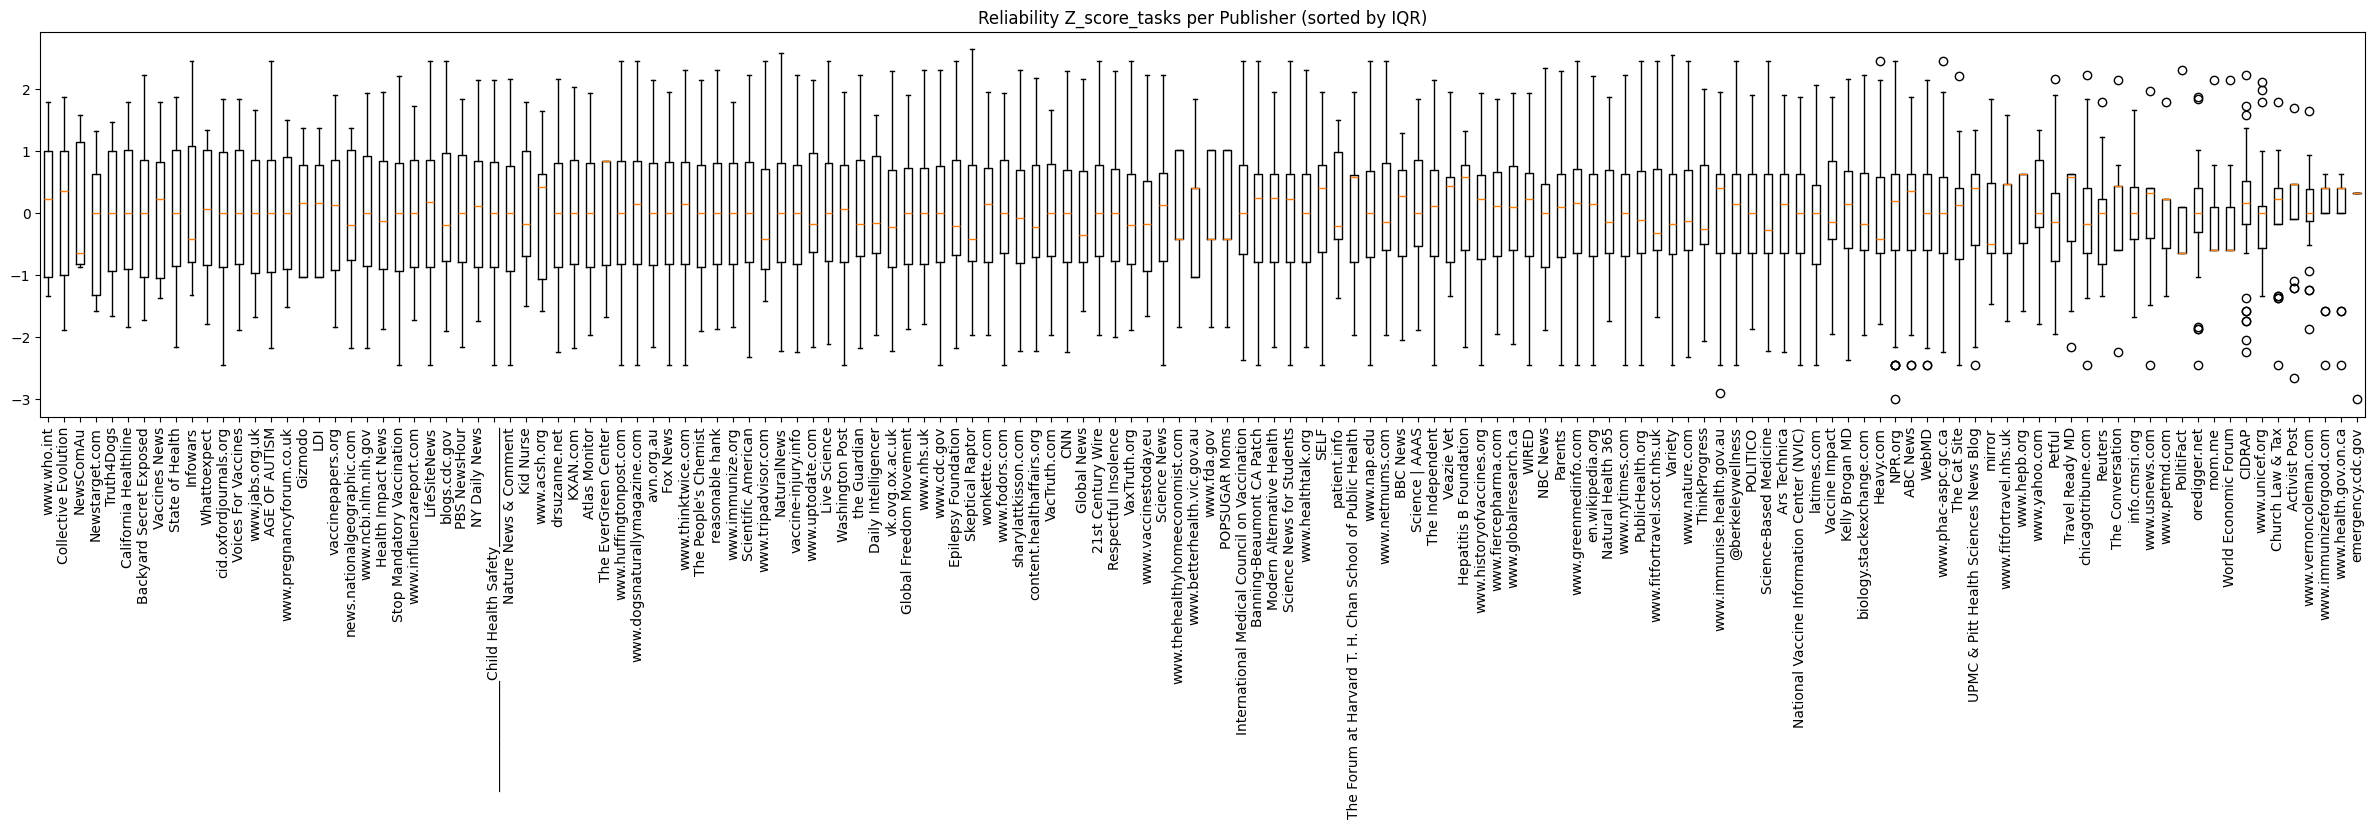

In [9]:
boxplot_per_publisher(df_no_zero, 'z_score_task', sortbydistribution=True)

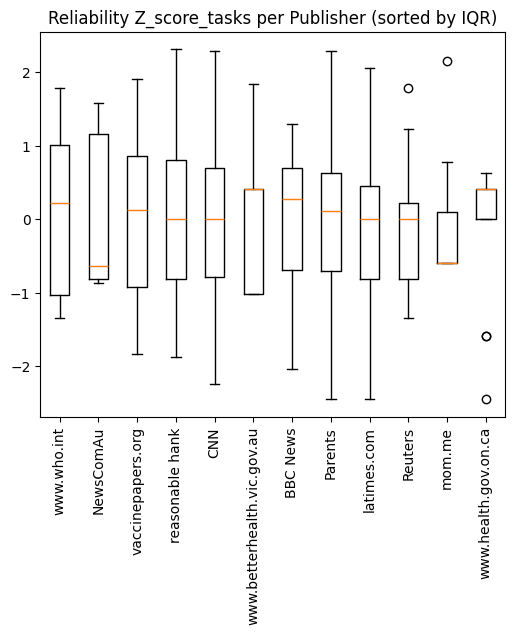

In [36]:
boxplot_per_publisher(
    df_no_zero, 
    'z_score_task', 
    subset=['www.who.int', 'NewsComAu', 'vaccinepapers.org', 'reasonable hank', 'CNN', 'www.betterhealth.vic.gov.au', 'BBC News', 'Parents', 'latimes.com', 'Reuters', 'mom.me', 'www.health.gov.on.ca'], 
    figsize=(6,5),
    sortbydistribution=True,
)

### Z-score per worker

In [70]:
from util import z_score_per_worker

df_no_zero = z_score_per_worker(df_no_zero)
df_no_zero.head()

/home/bbjoverbeek/master_thesis/util.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  z_scores_df = pd.concat(


,worker_id,task_id,task_response_id,file_id,sentence,tokens_id,publisher,source,reliability,Optional Comments:,batch_no,score,z_score_task,z_score_worker
0,23QWQCPZ7PNP,f79dff90-7723-4c33-9582-33e46ab6176c,15d3b8d0-d17f-49b2-bb2f-c113957cddf7,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",5 - The source is fully reliable,NaN,1,5,0.777778,0.000000
1,9R3XRNAAW7RR,f79dff90-7723-4c33-9582-33e46ab6176c,1bb0a245-1455-4ce7-8704-7e00c2b00d29,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",3 - The source is potentially reliable,NaN,1,3,-1.444444,-0.447214
2,9R3XRNAAW7RR,f79dff90-7723-4c33-9582-33e46ab6176c,1bb0a245-1455-4ce7-8704-7e00c2b00d29,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",3 - The source is potentially reliable,NaN,1,3,-1.444444,1.341641
3,9R3XRNAAW7RR,f79dff90-7723-4c33-9582-33e46ab6176c,1bb0a245-1455-4ce7-8704-7e00c2b00d29,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",3 - The source is potentially reliable,NaN,1,3,-1.444444,0.447214
4,9R3XRNAAW7RR,f79dff90-7723-4c33-9582-33e46ab6176c,1bb0a245-1455-4ce7-8704-7e00c2b00d29,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",3 - The source is potentially reliable,NaN,1,3,-1.444444,-1.341641


---------------------- reliability_scores_distribution() -----------------------
     """Prints the distribution of the (reliability) scores in a column"""      

z_score_worker
-4.0        59
-3.1       139
-3.0      3216
-2.8      5537
-2.7      4581
-2.5      9320
-2.4      1815
-2.3        23
-2.2      1329
-2.1     15467
-2.0      7309
-1.9      5086
-1.8     95525
-1.7     46204
-1.6    253459
-1.5    166410
-1.4     80903
-1.3    308803
-1.2     98367
-1.1     62134
-1.0    163147
-0.9     90932
-0.8    181077
-0.7    384591
-0.6     68954
-0.5    566402
-0.4     83924
-0.3    307381
-0.2    248787
-0.1     51603
 0.0    271932
 0.1    418953
 0.2    103008
 0.3    356198
 0.4    146521
 0.5    207364
 0.6    264617
 0.7     32743
 0.8    214367
 0.9    243266
 1.0    260579
 1.1    140230
 1.2    201955
 1.3     92579
 1.4    115194
 1.5    114427
 1.6    145813
 1.7     76683
 1.8     93501
 1.9     33158
 2.0     32179
 2.1     73843
 2.2     29335
 2.3       359
 2.5     137

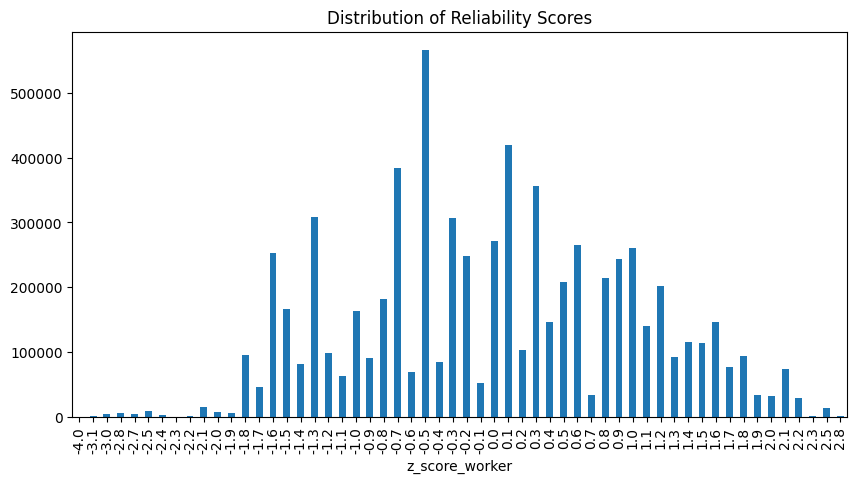

In [21]:
reliability_scores_distribution(df_no_zero['z_score_worker'].round(1), rot=90, figsize=(10,5))

#### Worker statistics

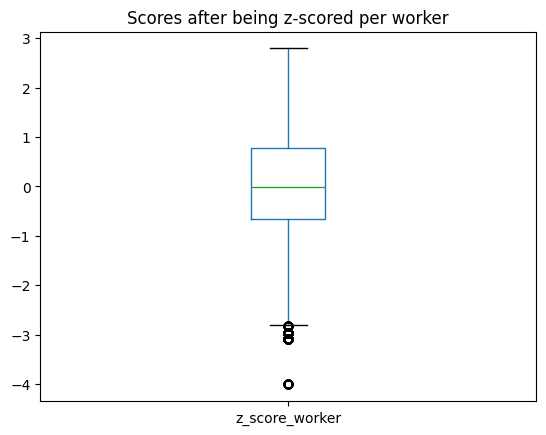

count    6.996645e+06
mean     1.552087e-17
std      9.999991e-01
min     -4.007343e+00
25%     -6.638551e-01
50%     -1.903546e-02
75%      7.683788e-01
max      2.794374e+00
Name: z_score_worker, dtype: float64
The outliers see in the boxplot are caused by 3 different workers
The outliers see in the boxplot are divided over 583 different tasks


In [83]:
# score_per_worker(df_no_zero, 'z_score_worker')
df_no_zero.boxplot(column='z_score_worker', grid=False)
plt.title('Scores after being z-scored per worker')
plt.show()

print(df_no_zero['z_score_worker'].describe())

# see how many different workers cause the outliers
bottom_whisker = df_no_zero['z_score_worker'].quantile(0.25) - ((df_no_zero['z_score_worker'].quantile(0.75) - df_no_zero['z_score_worker'].quantile(0.25)) * 1.5)
print(f'The outliers see in the boxplot are caused by {len(df_no_zero[df_no_zero["z_score_worker"] < bottom_whisker]["worker_id"].unique())} different workers')
print(f'The outliers see in the boxplot are divided over {len(df_no_zero[df_no_zero["z_score_worker"] < bottom_whisker]["task_id"].unique())} different tasks')


#### Publisher statistics

---------------------------- score_per_publisher() -----------------------------
               """Prints the scores in `colname` per publisher"""               



The mean reliability score per publisher is:

21st Century Wire                                          1.623819e-17
@berkeleywellness                                          2.265350e-17
ABC News                                                   1.410314e-17
AGE OF AUTISM                                              2.471708e-17
Activist Post                                              8.727898e-18
Ars Technica                                               6.903773e-18
Atlas Monitor                                              2.555837e-17
BBC News                                                   1.111552e-17
Backyard Secret Exposed                                    3.429839e-18
Banning-Beaumont CA Patch                                  1.911870e-17
CIDRAP                                                     2.313177e-17
CNN                                                        1.405451e-17
California Healthline                                      2.720681e-17
Church Law & Tax  

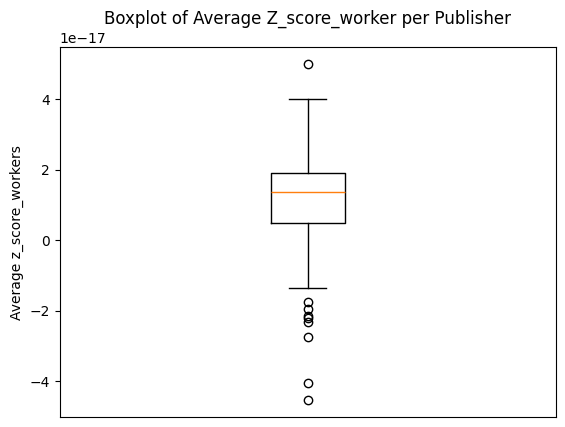

--------------------------------------------------------------------------------



In [23]:
score_per_publisher(df_no_zero, 'z_score_worker')

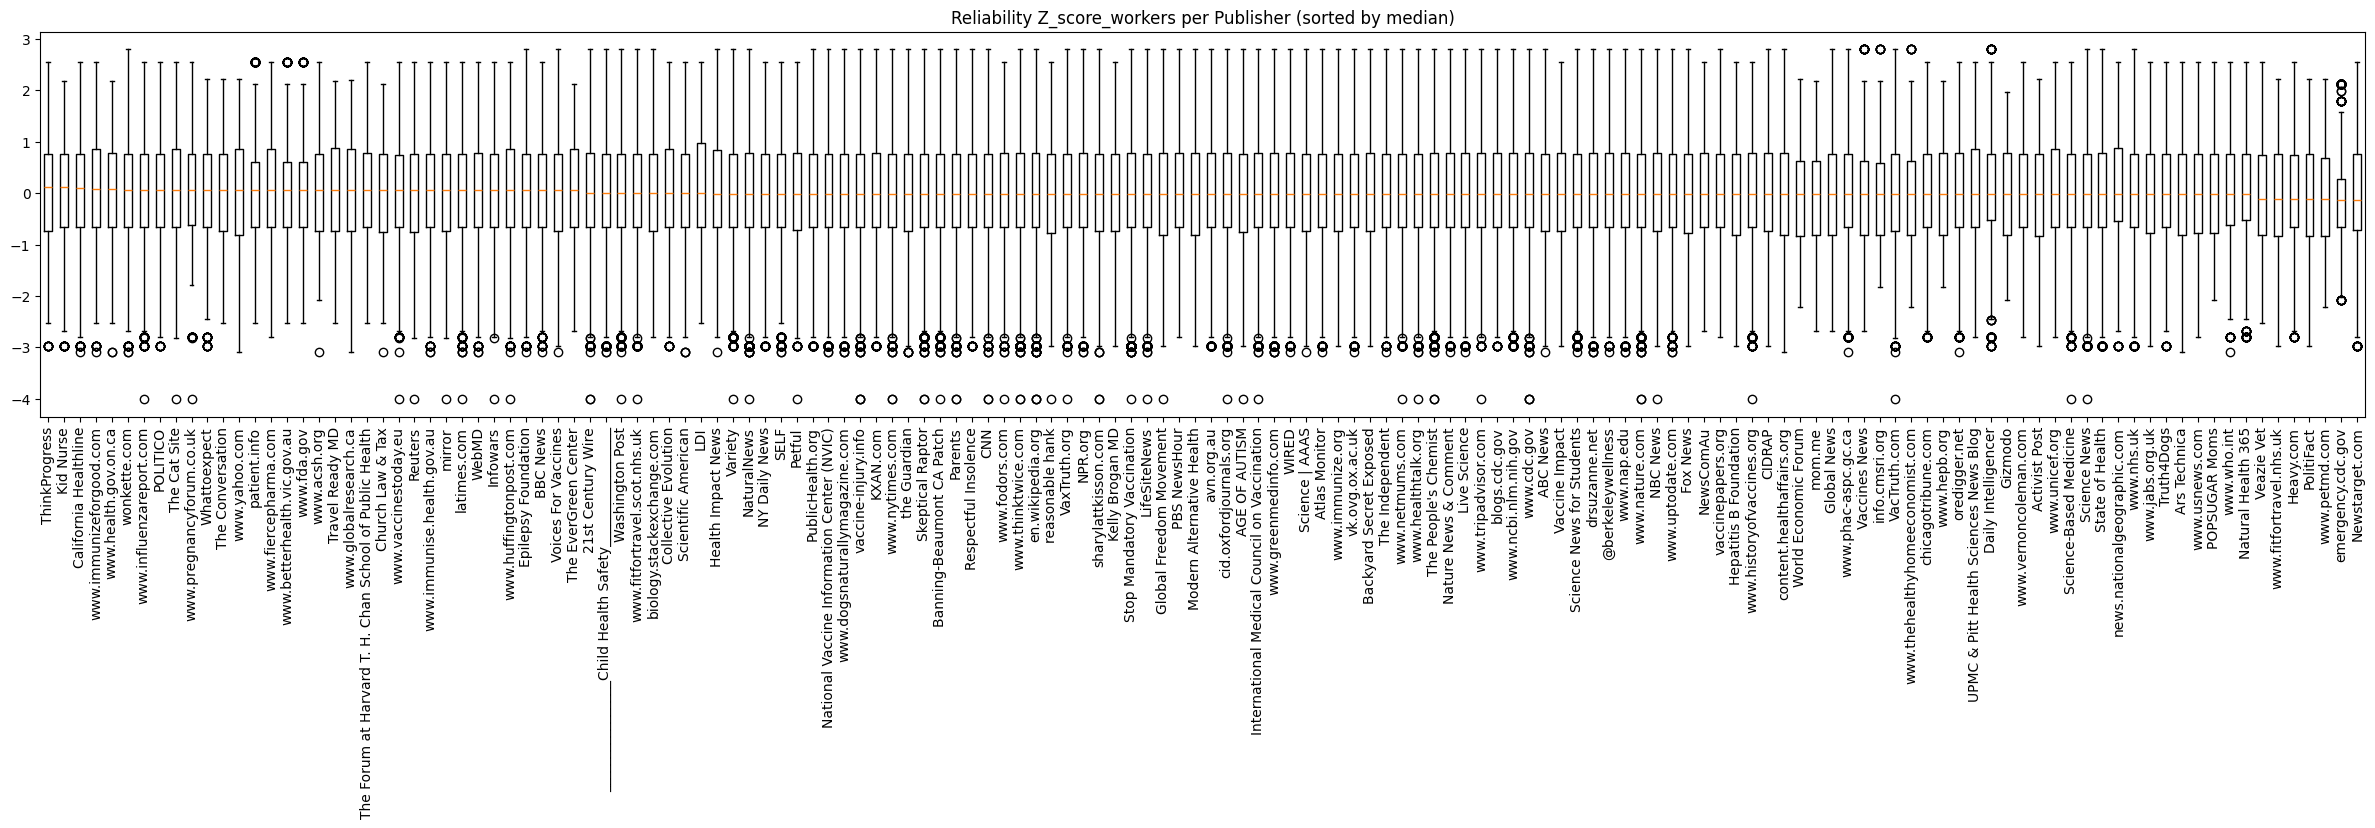

In [104]:
boxplot_per_publisher(df_no_zero, 'z_score_worker')

## Zero-scores

In [25]:
print(f'There are {len(df[df["score"]== 0])} zero-scores in the dataset')

There are 359 zero-scores in the dataset


---------------------------- zero_scores_per_task() ----------------------------
            """Prints the distribution of tasks with zero scores"""             

There are 2195 tasks that did not receive zero scores, and 2444 tasks that did receive zero scores.
See the distribution of zero scores below:

1    188
2     30
3     18
4      9
5      3
6      1
Name: count, dtype: int64
--------------------------------------------------------------------------------



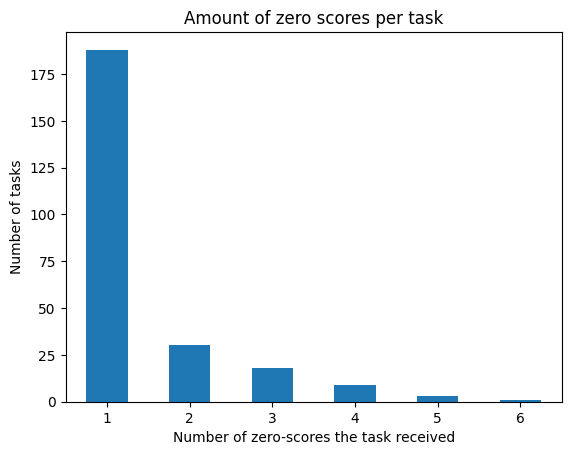

In [64]:
# make histogram of tasks scored with 0
@print_formatting
def zero_scores_per_task(df: pd.DataFrame) -> None:
    """Prints the distribution of tasks with zero scores"""

    zero_scores = []
    for task_id in df['task_id'].unique():
        zero_scores.append(str(df[df['task_id'] == task_id]['score'].value_counts().get(0, 0)))


    zero_scores_series = pd.Series(zero_scores)

    print(f'There are {zero_scores_series[zero_scores_series == "0"].count()} tasks that did not receive zero scores, and {zero_scores_series.count()} tasks that did receive zero scores.')
    print('See the distribution of zero scores below:\n')

    zero_scores_series = zero_scores_series[zero_scores_series != '0']
    print(zero_scores_series.value_counts())


    # make histogram of tasks scored with 0
    # zero_scores_series.hist(bins=6, align='mid', grid=False, by='score')
    # plt.bar(zero_scores_series)
    zero_scores_series.value_counts().plot(kind='bar', rot=True)
    plt.xlabel('Number of zero-scores the task received')
    plt.ylabel('Number of tasks')
    plt.title('Amount of zero scores per task')
    # zero_scores_series.plot(kind='bar')

zero_scores_per_task(df)

---------------------------- zero_scores_average() -----------------------------
  """Computes the average reliability score for each amount of zero-scores"""   

   num_zero_scores  avg_score_no_zero
0                0           3.037611
1                1           2.607861
2                2           2.721667
3                3           3.000000
4                4           2.814815
5                5           2.166667
6                6           2.000000
--------------------------------------------------------------------------------



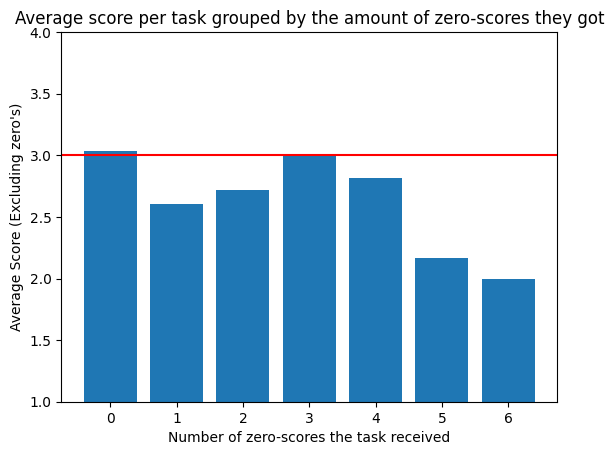

In [73]:
# average scores of tasks with low zero-scores

@print_formatting
def zero_scores_average(df: pd.DataFrame) -> None:
    """Computes the average reliability score for each amount of zero-scores"""

    zero_scores = []
    for task_id in df['task_id'].unique():
        no_zero_scores = df[df['task_id'] == task_id]['score'].value_counts().get(0, 0)
        avg_other_scores = df[(df['task_id'] == task_id) & (df['score'] != 0)]['score'].mean()
        zero_scores.append({
            # 'task_id': task_id,
            'num_zero_scores': no_zero_scores,
            'avg_score_no_zero': avg_other_scores,
        })

    zero_scores_df = pd.DataFrame(zero_scores)
    zero_scores_df = zero_scores_df.groupby(['num_zero_scores'], as_index=False).agg({'avg_score_no_zero': 'mean'})
    print(zero_scores_df)
    
    avg_score_no_zero = df[df['score'] != 0]['score'].mean()

    plt.bar(zero_scores_df['num_zero_scores'], zero_scores_df['avg_score_no_zero'])
    plt.xlabel('Number of zero-scores the task received')
    plt.ylabel('Average Score (Excluding zero\'s)')
    plt.ylim((1,4))
    plt.axhline(y =avg_score_no_zero, color='red')
    plt.title('Average score per task grouped by the amount of zero-scores they got')

zero_scores_average(df)

In [27]:
# print tasks that got 5 zero-scores

task_ids = set()
for task_id in df['task_id'].unique():
    zero_scores = df[df['task_id'] == task_id]['score'].value_counts().get(0)
    zero_scores = zero_scores if zero_scores else 0
    if (zero_scores >= 5) and (task_id not in task_ids):
        task_ids.add(task_id)
        task_example = df[df['task_id'] == task_id][['publisher', 'source']]
        print(f'The following task got {zero_scores} zero-scores:')
        print(f'publisher: {task_example["publisher"].values[0]} | claimant: {task_example["source"].values[0]}')
        print()

The following task got 5 zero-scores:
publisher: www.cdc.gov | claimant: 29 ( 43 % )

The following task got 6 zero-scores:
publisher: California Healthline | claimant: \" shots \" ( Hensley , \" Shots , \" NPR , 3/16 )

The following task got 5 zero-scores:
publisher: www.cdc.gov | claimant: 29 ( 43 % )

The following task got 5 zero-scores:
publisher: www.cdc.gov | claimant: 29 ( 43 % )



----------------------------- worker_zero_scores() -----------------------------
   """Prints the number of workers that used 0 to score at least one task"""    

47 workers used 0 to score at least one task, and 60 workers did not.
--------------------------------------------------------------------------------



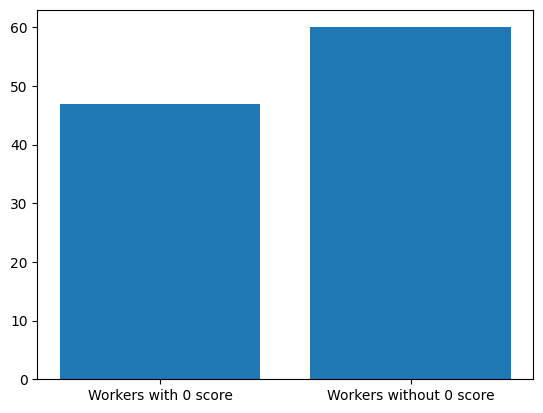

In [28]:
# count how many annotators used 0 to score a task

@print_formatting
def worker_zero_scores(df = pd.DataFrame) -> None:
    """Prints the number of workers that used 0 to score at least one task"""

    workers_with_zero_score = 0
    for worker_id in df['worker_id'].unique():
        if 0 in df[df['worker_id'] == worker_id]['score'].values:
            workers_with_zero_score += 1

    print(f'{workers_with_zero_score} workers used 0 to score at least one task, and {len(df["worker_id"].unique()) - workers_with_zero_score} workers did not.')
    
    plt.bar(['Workers with 0 score', 'Workers without 0 score'], [workers_with_zero_score, len(df["worker_id"].unique()) - workers_with_zero_score])


worker_zero_scores(df)